<a href="https://colab.research.google.com/github/delafte/CC3001-Algoritmos_y_Estructuras_de_Datos/blob/main/Tarea2/tareaoficial_Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2023 Tarea  [Delaney Tello]

# Calculadora

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Enunciado

Esta tarea consiste en desarrollar una calculadora de expresiones matemáticas al estilo Matlab o Maple, pero con capacidad de procesar un conjunto de comandos bien restringido. Algunos ejemplos de los comandos que acepta y de lo que debe imprimir en la salida van a continuación:

|Entrada (lo que el usuario escribe)   | Salida(lo que imprime el programa)  |
|---|---|
|n=5   | 5  |
|hanoi=2^n-1    |31   |
|var_1 = 23 - 13 + hanoi * 2    |82   |
|h2 = hanoi /2   |15   |
|n   |5   |

A continuación definimos más en detalle lo que se debe implementar:



1.   Cada comando es de la forma "variable=expresión". El efecto es que se debe calcular la expresión de la derecha, guardar el resultado en la variable de la izquierda e imprimir el resultado en la salida. Si se omite desde el "=" hacia adelante (como en el último ejemplo), solo se imprime el valor de la variable. Las variables comienzan con letra y continúan con letras, dígitos y el signo "_".
2.   Los operadores permitidos son "+","-","*", "/", "^".
3.   Solo se trabaja con números enteros y todas las operaciones dan resultado entero (incluyendo la división, que trunca).
4.   Para simplificar, no se puede usar paréntesis y la expresión se evalúa estrictamente de izquierda a derecha. Eso explica el resultado que se obtiene para "var_1".
5.   Si se utiliza una variable que aún no ha sido definida, se debe dar un error

      ERROR: variable indefinida "..."

6.   Si la sintaxis no es correcta, se debe imprimir en la salida un mensaje de la forma

      ERROR: al procesar "..."

      donde el string que se imprime es la parte de la entrada desde el punto del error hacia adelante.


Antes de empezar a escribir código, usted debe dibujar un diagrama de estados que describa la estructura de la entrada. Si le resulta más conveniente, pueden ser varios diagramas (por ejemplo, uno que describa la estructura de una variable, otro la de un número, otra la de un comando). Luego, a partir de ahí escriba el código que implementa esos diagramas. **Importante:** Su código debe ir procesando de un caracter a la vez, para este procesamiento no se puede utilizar funciones de Python que operen sobre strings de largo mayor que uno. Se recomienda tener una función que reciba un comando en un string y lo procese, y otra que se encargue de ir leyendo líneas una a una e invocando a la función antes mencionada para procesarlas.

Para almacenar los nombres y valores de las variables, está permitido el uso de un diccionario de Python.

En su entrega debe describir brevemente el problema, luego describir la estrategia de solución a través de los diagramas de estados, y a continuación el código ejecutable respectivo, agregando todas las explicaciones necesarias para que se entienda.



**Descripción breve del problema**

Se nos entrega una lista con strings que debemos procesar de tal modo que entreguen un resultado, en el caso que estén bien definidos, y en el contrario, indicar el tipo de error.

Debemos ser capaces de procesar y clasificar uno a uno los carácteres de cada string, para luego poder realizar las operaciones correspondientes. Para ello, se ocupan estados, que en mi caso no son explícitos, pero que sin duda están gracias a las clasificaciones impuestas en el código.

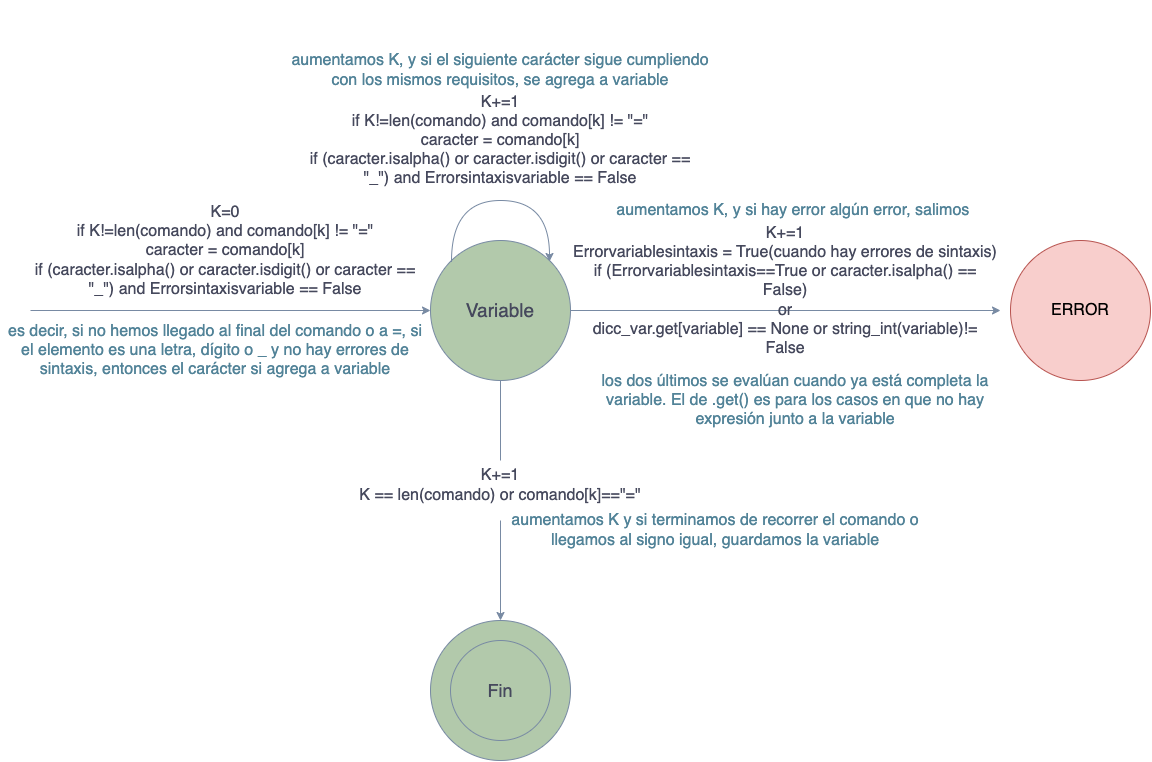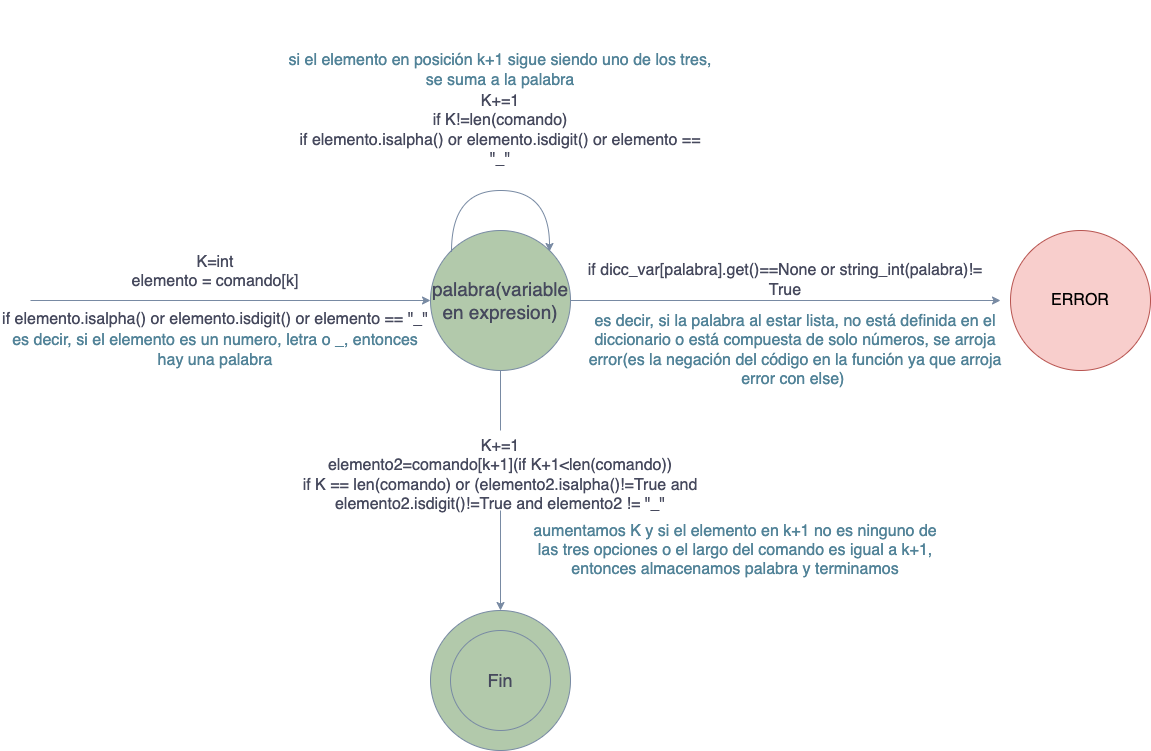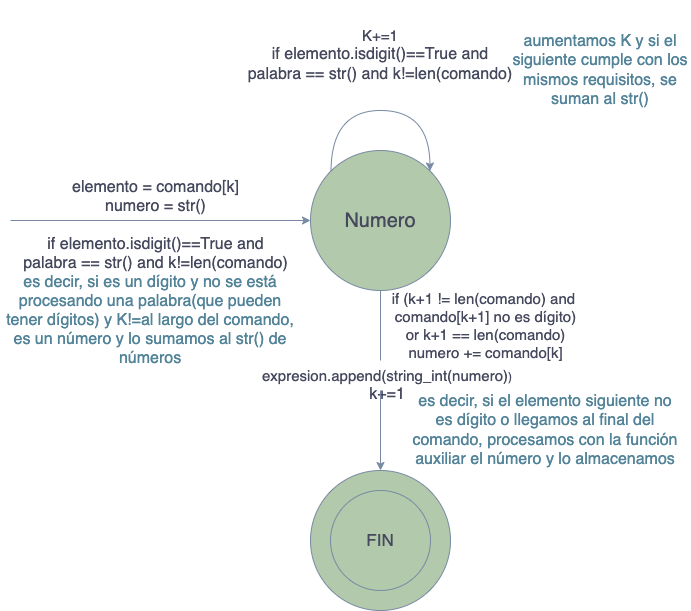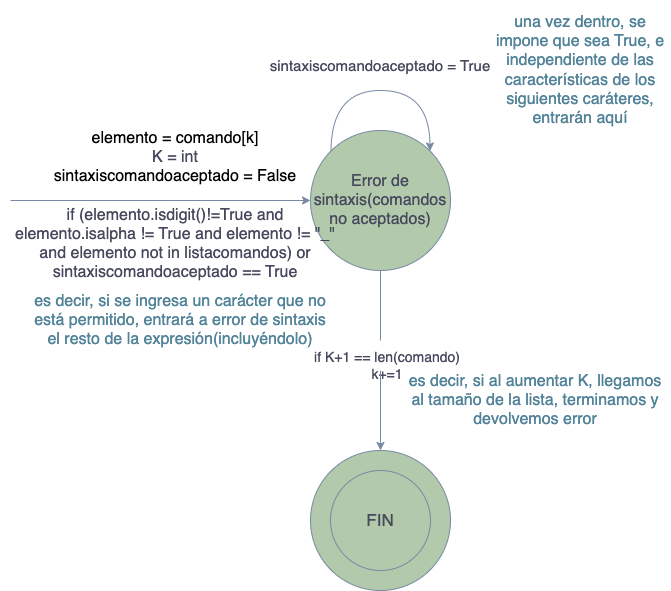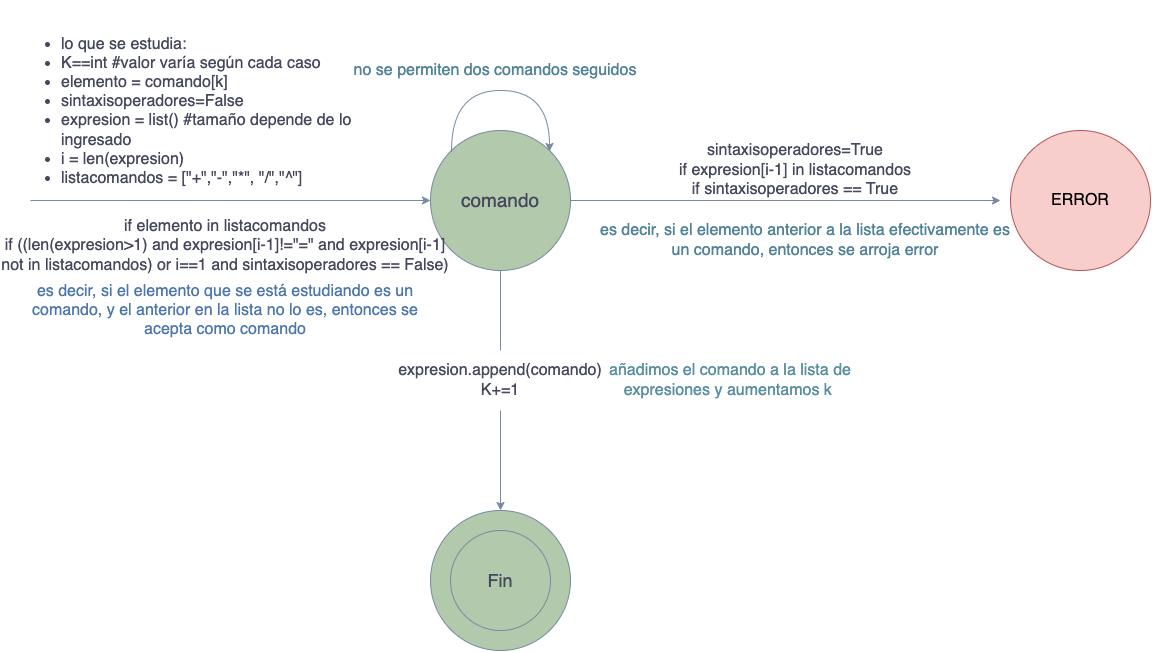

In [ ]:
#Funcion auxiliar para pasar de string a numero, procesando de a un caracter string. Ademas, se le agrego la condicion de devolver False en caso de
#que hayan letras en el string que se entregue, esto nos servira para clasificar variables compuestas de letras y numeros.
def string_int(palabra):
  largo = len(palabra)
  k=0
  numero = 0
  while(k < largo):
    if(palabra[k].isalpha()==True or palabra[k]=="_"):#en varias partes de la tarea se incluye tambien "_" como caracter permitido en la calculadora, por el ejemplo.
      k = largo
      return False
    #para procesar numeros:
    num = int(palabra[k])
    numero+=int(num*((10**(largo-1))/(10**k)))
    k+=1
  return numero

In [ ]:
def operar(lista, diccionario,i):#esta es una funcion recursiva encargada de procesar(operar elementos) una lista dentro de un diccionario, i es el largo de la lista -1.
  if i==0:#caso base
    if type(lista[i]) == int:#si es un numero
       return lista[i]
    else:#si es una variable, hay que buscar su valor en el diccionario
      buscar = lista[i]
      valor = diccionario[buscar]
      return valor
  else:#llamadas recursivas para operar, separados por casos segun el operador
    if type(lista[i]) == int:#si es que el elemento es un numero:
      if lista[i-1] == "+":
        return operar(lista,diccionario,i-1) + lista[i]
      elif lista[i-1] == "-":
        return operar(lista,diccionario,i-1) - lista[i]
      elif lista[i-1] == "*":
        return operar(lista,diccionario,i-1) * lista[i]
      elif lista[i-1] == "/":
        return int(operar(lista,diccionario,i-1) / lista[i])
      elif lista[i-1] == "^":
        return operar(lista,diccionario,i-1) ** lista[i]
    elif lista[i] =="+" or lista[i]=="-" or lista[i]=="*" or lista[i]=="/" or lista[i]=="^":
      return operar(lista,diccionario,i-1)
    else:#si es que hay variables:
      buscar = lista[i]
      valor = diccionario[buscar]
      if lista[i-1] == "+":
        return operar(lista,diccionario,i-1) + valor
      elif lista[i-1] == "-":
        return operar(lista,diccionario,i-1) - valor
      elif lista[i-1] == "*":
        return operar(lista,diccionario,i-1) * valor
      elif lista[i-1] == "/":
        return int(operar(lista,diccionario,i-1) / valor )
      elif lista[i-1] == "^":
        return operar(lista,diccionario,i-1) ** valor

In [ ]:
# Esta función recibe un comando en string y el diccionario de variables. Con él,
# procesa el comando, imprime el resultado de la expresion
# y posiblemente modifica el diccionario. La función retorna el diccionario
def procesar_comando(comando, dicc_var,l):#agregue l para el caso que hayan varios errores del mismo tipo, no se sobreescriban en el diccionario
  k=0#k nos servira para controlar los ciclos usando de limite el largo del comando
  variable = str()#inicializamos variable
  listacomandos=["+", "-", "*", "/", "^"]#lista de comandos permitidos para operar
  Errorsintaxisvariable = False #Esto nos servirá para cuando hayan errores de sintaxis en la variable
  sintaxis=str() #para almacenar el error de sintaxis de la variable
  while(k != len(comando) and comando[k] != "="):#comenzamos a procesar variable
    caracter = comando[k]
    if caracter == " ":
      k+=1
    elif (caracter.isalpha() or caracter.isdigit() or caracter == "_") and Errorsintaxisvariable==False:
      variable += str(comando[k])
      k+=1
    elif caracter.isalpha()==False or Errorsintaxisvariable == True:#cuando encontramos errores de sintaxis
      sintaxis += str(caracter)
      Errorsintaxisvariable = True
      if k+1 == len(comando) or comando[k+1] == "=":
        variable = f"Error sintaxis variable {l}"
        expresion = "ERROR: al procesar \"" + sintaxis +"\""
      k+=1
  #al terminar el ciclo tendremos la variable completa
  #Definimos/determinamos los casos de error en variable
  if variable == f"Error sintaxis variable {l}":
    print(expresion)
    dicc_var[variable] = expresion
    return dicc_var
  elif string_int(variable) != False:
    dicc_var[f"Error: no se definio la variable {l}"] = variable
    print(f"Error: no se definio la variable \"{variable}\"")
    return dicc_var

  if k==len(comando):#si es que solo se ingreso un variable
    expresion = "solo variable"

  elif k < len(comando):#si es que aun quedan elementos, es decir, que hay algo luego de =, almacenaremos la expresion dividida en una lista------------------
    sintaxiscomandonoaceptado = False#nos serivirá para identificar cuando se ingresan caracteres no permitidos
    Expresionmalasintaxis = str()#aca se almacenara la expresion a devolver en el error
    sintaxisoperadores=False#nos servirá para el caso de que se ingresen operadores seguidos

    if comando[k] == "=":#como en variable nos detenemos en el =, hay que saltarselo
      k+=1
    expresion = []#definimos la lista que almacenara la expresion
    numero = str()#inicializamos string que contendra algun numero
    palabra = str()#inicializamos string que contendra alguna palabra
    while(k < len(comando)):#iniciamos el ciclo para separar la expresion y almacerla en la lista, procesar e imprimir. Tambien para los errores.

      elemento = comando[k]#utilizamos esto para poder usar funciones como isalpha()
      if elemento == " ":
        k+=1
      #caracteres no permitidos:
      elif (elemento.isalpha()==False and elemento.isdigit()==False and (elemento not in listacomandos) and elemento !="_") or sintaxiscomandonoaceptado == True:
        sintaxiscomandonoaceptado = True
        Expresionmalasintaxis += elemento
        if k+1 == len(comando):
          expresion = "ERROR: al procesar \"" + Expresionmalasintaxis+"\""
          variable = f"Error sintaxis expresion {l}"
          dicc_var[variable] = expresion
          print(expresion)
          return dicc_var
        k += 1
      #guardamos operadores:
      elif elemento in listacomandos or sintaxisoperadores == True:
        i = len(expresion)
        if (len(expresion)>1 and expresion[i-1] != "=" and (expresion[i-1] not in listacomandos))or i==1 and sintaxisoperadores == False:
          expresion.append(elemento)
        else:#si es que hay operadores seguidos:
            sintaxisoperadores = True
            Expresionmalasintaxis += str(elemento)
            if k+1 == len(comando):
              expresion = "ERROR: al procesar \""+Expresionmalasintaxis+"\""
              variable = f"Error sintaxis expresion {l}"
              dicc_var[variable]=expresion
              print(expresion)
              return dicc_var
        k+=1
      #guardamos numeros:
      elif elemento.isdigit() and palabra == str():#la parte de palabra es para el caso en que salga una variable con numero, no entre en este estado
        numero += str(elemento)
        if k+1 != len(comando):
          elemento2 = comando[k+1]
        if (k+1) == len(comando) or elemento2.isdigit()==False:
            expresion.append(string_int(numero))#usamos la funcion auxiliar para pasar el string a int
            numero = str()#reiniciamos numero
        k+=1
      #guadamos palabras(variables)
      elif elemento.isalpha() or elemento.isdigit() or elemento == "_":
          palabra += str(elemento)
          if k+1 != len(comando):
            elemento2 = comando[k+1]
          if (k+1) == len(comando) or (elemento2.isalpha()!= True and elemento2.isdigit()!=True and elemento2!="_"):
            if dicc_var.get(palabra) != None and string_int(palabra)==False:
              expresion.append(palabra)
              palabra = str()#reiniciamos palabra
            else:#en caso de que no esten previamente definidas en el diccionario
              expresion = f"ERROR: variable indefinida \"{palabra}\""
              variable = "Error definicion palabra"
              dicc_var[variable] = expresion
              print(expresion)
              return dicc_var
          k += 1
  if expresion != "solo variable":
     resultado= operar(expresion, dicc_var, i=(len(expresion)-1))#operamos elementos en la lista
     dicc_var[variable] = resultado#guadamos resultado en la lista con la varible como clave
     print(resultado)#imprimimos resultado
     return dicc_var
  else:
    if dicc_var.get(variable)!= None:#buscamos si la variable ya esta definida en el diccionario
       dicc_var["solo variable"] = dicc_var[variable]
       print(dicc_var[variable])#imprimimos valor previamente almacenado
       return dicc_var
    else:
      if variable == "" or variable == " ":#nos saltamos esto casos
        return dicc_var
      else:
        dicc_var["solo variable"] = f"Error: no se definio {variable}"#caso de variables no definidas previamente en el diccionario
        print(f"ERROR: no se definio \"{variable}\"")
        return dicc_var

In [ ]:
def calculadora(lista_comandos):
  vars = dict()
  # Se procesan todos los comandos de la lista (lista de string)
  for i in range(0, len(lista_comandos)):
    vars = procesar_comando(lista_comandos[i], vars, i)

## Ejemplo 1

In [ ]:

# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi * 2","h2 = hanoi /2","","n"]
calculadora(lista)


5
31
82
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

   5

   31

   82

   15

   5



## Ejemplo 2

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
ERROR: variable indefinida "hanoi2"
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

5

31

ERROR: variable indefinida "hanoi2"

15

5

In [ ]:

# Otros tests:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + * hanoi * 2","h2 = +hanoi /2=","n"]
calculadora(lista)
lista2 = ["n=10","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = var_1 /2","","n","/","n=3=","hanoi2=1%2"]
calculadora(lista2)

5
31
ERROR: al procesar "*hanoi*2"
ERROR: al procesar "+hanoi/2="
5
10
1023
ERROR: variable indefinida "hanoi2"
ERROR: variable indefinida "var_1"
10
ERROR: al procesar "/"
ERROR: al procesar "="
ERROR: al procesar "%2"


## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.